<a href="https://www.kaggle.com/code/amirhosseinzinati/customer-clustering-hierarchical-k-means-dbscan?scriptVersionId=135435987" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [2]:
data = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# Aim :
* To classify / cluster Mall Customers based on numerical and categorical features.
* It is an Unsupervised Learning problem statement.
# Dataset Attributes
* CustomerID : Unique ID assigned to the customer
* Gender : Gender of the customer
* Age : Age of the customer
* Annual Income (k$) : Annual Income of the customer
* Spending Score (1-1000) : Score assigned by the mall based on customer behavior and spending nature

# EDA And Preproccessing

In [3]:
data.shape

(200, 5)

In [4]:
# information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:

info = pd.DataFrame(data.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",data.isna().sum(),True)
info.insert(2,"Duplicate",data.duplicated().sum(),True)
info.insert(3,"Unique",data.nunique(),True)
info.insert(4,"Min",data.min(),True)
info.insert(5,"Max",data.max(),True)
info.T    

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
IsNull,0,0,0,0,0
IsNa,0,0,0,0,0
Duplicate,0,0,0,0,0
Unique,200,2,51,64,84
Min,1,Female,18,15,1
Max,200,Male,70,137,99


# Plot information

In [6]:
def diagnostic_plots(df, variable,target):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(20, 7))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], kde = True,color='r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 3, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    
    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')
       
    plt.show()

In [7]:
df = data.copy()
df = df.drop(["CustomerID"], axis = 1)

In [8]:
df['Gender'].replace({"Male":0,"Female":1,}, inplace=True)

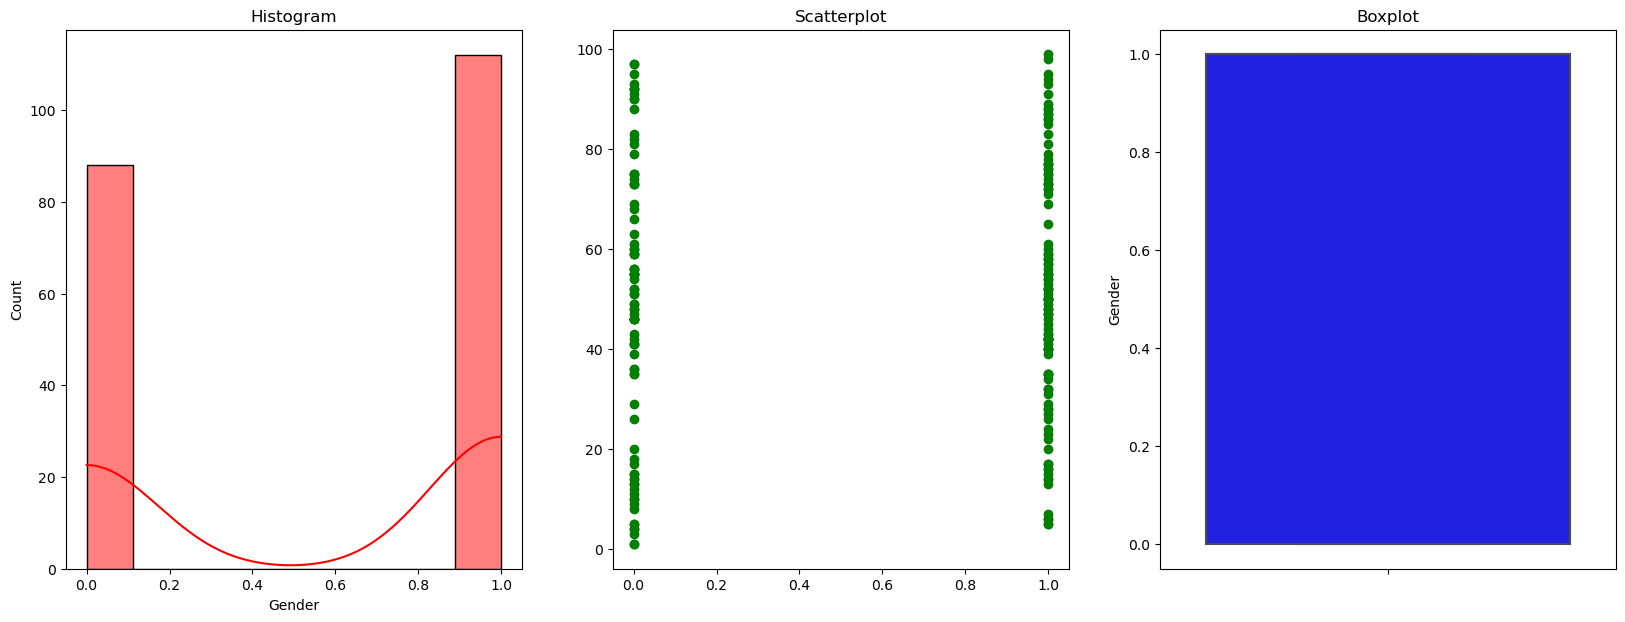

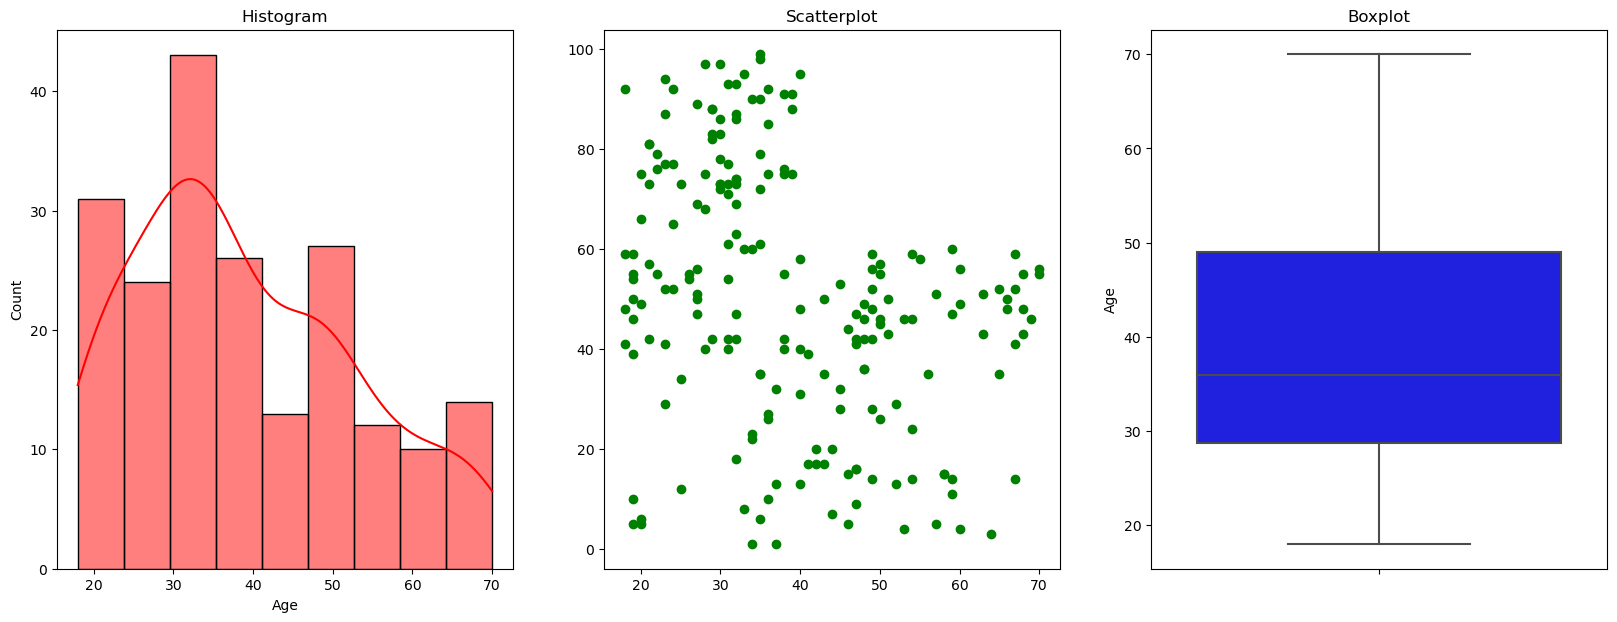

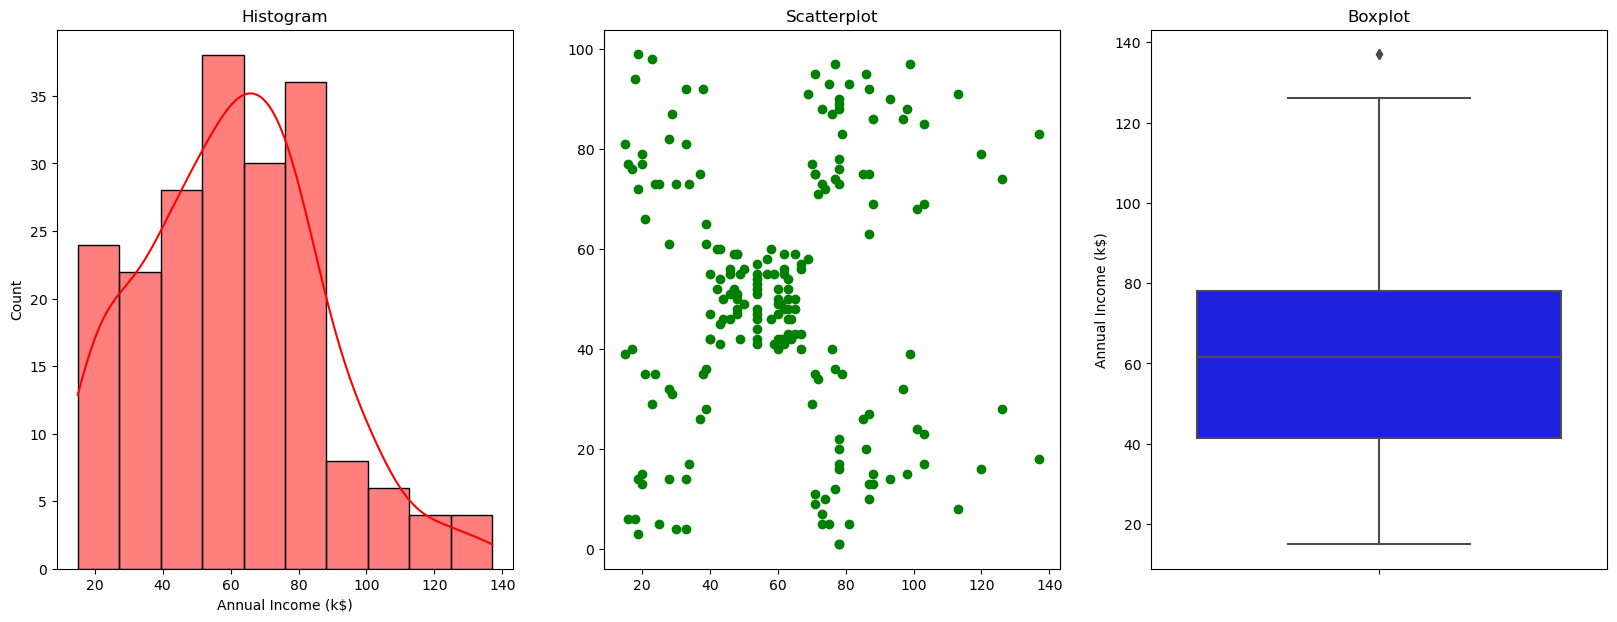

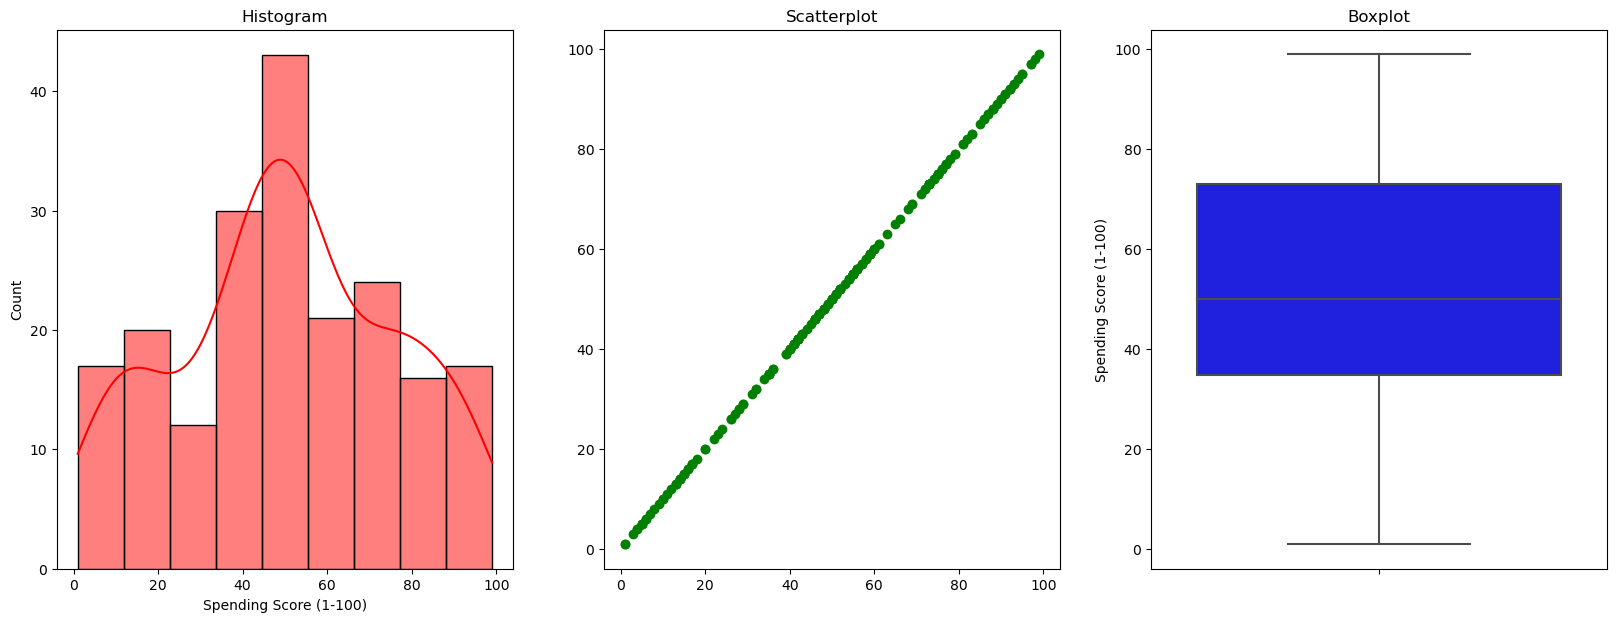

In [9]:
for col in df:
    diagnostic_plots(df,col,'Spending Score (1-100)')

In [10]:
noise_Annual_Income=df[(data['Annual Income (k$)'] >135)]
noise_Annual_Income

,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,0,32,137,18
199,0,30,137,83


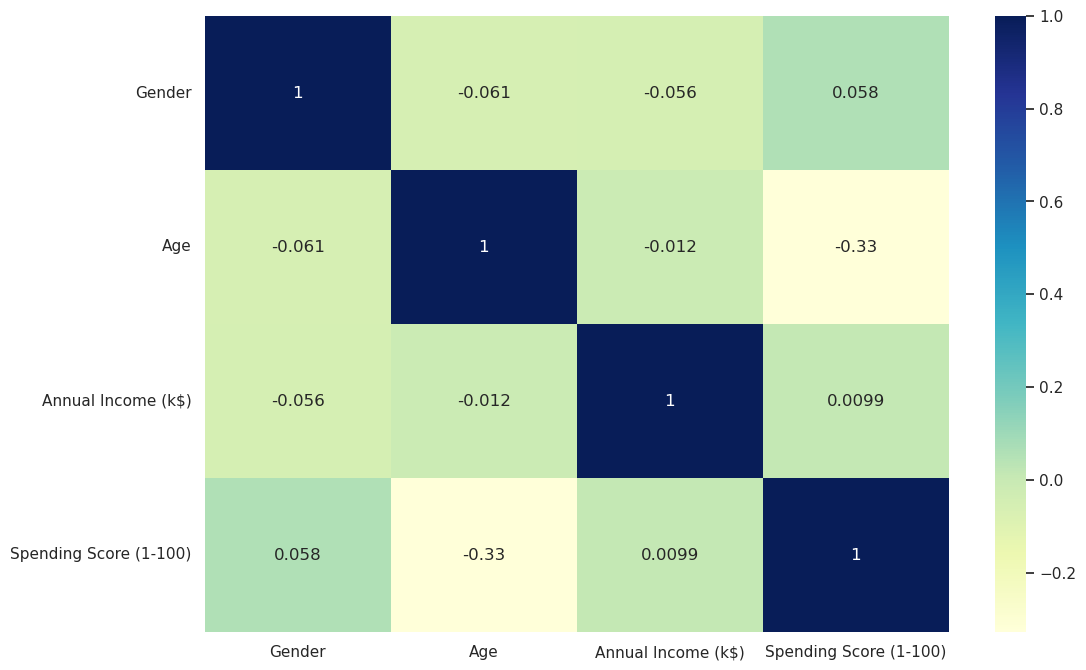

In [11]:
sns.set(rc={'figure.figsize':(12,8)})
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# Modeling

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering Technique:

Hierarchical clustering is one of the popular and easy to understand clustering technique. This clustering technique is divided into two types:

* Agglomerative
* Divisive

Agglomerative Hierarchical clustering Technique: In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed.

The basic algorithm of Agglomerative is straight forward.

Compute the proximity matrix Let each data point be a cluster Repeat: Merge the two closest clusters and update the proximity matrix Until only a single cluster remains Key operation is the computation of the proximity of two clusters.

To understand better let’s see a pictorial representation of the Agglomerative Hierarchical clustering Technique. Lets say we have six data points {A,B,C,D,E,F}.

* Step- 1: In the initial step, we calculate the proximity of individual points and consider all the six data points as individual clusters as shown in the image below.
* Step- 2: In step two, similar clusters are merged together and formed as a single cluster. Let’s consider B,C, and D,E are similar clusters that are merged in step two. Now, we’re left with four clusters which are A, BC, DE, F.
* Step- 3: We again calculate the proximity of new clusters and merge the similar clusters to form new clusters A, BC, DEF.
* Step- 4: Calculate the proximity of the new clusters. The clusters DEF and BC are similar and merged together to form a new cluster. We’re now left with two clusters A, BCDEF.
* Step- 5: Finally, all the clusters are merged together and form a single cluster.
The Hierarchical clustering Technique can be visualized using a Dendrogram.

A Dendrogram is a tree-like diagram that records the sequences of merges or splits

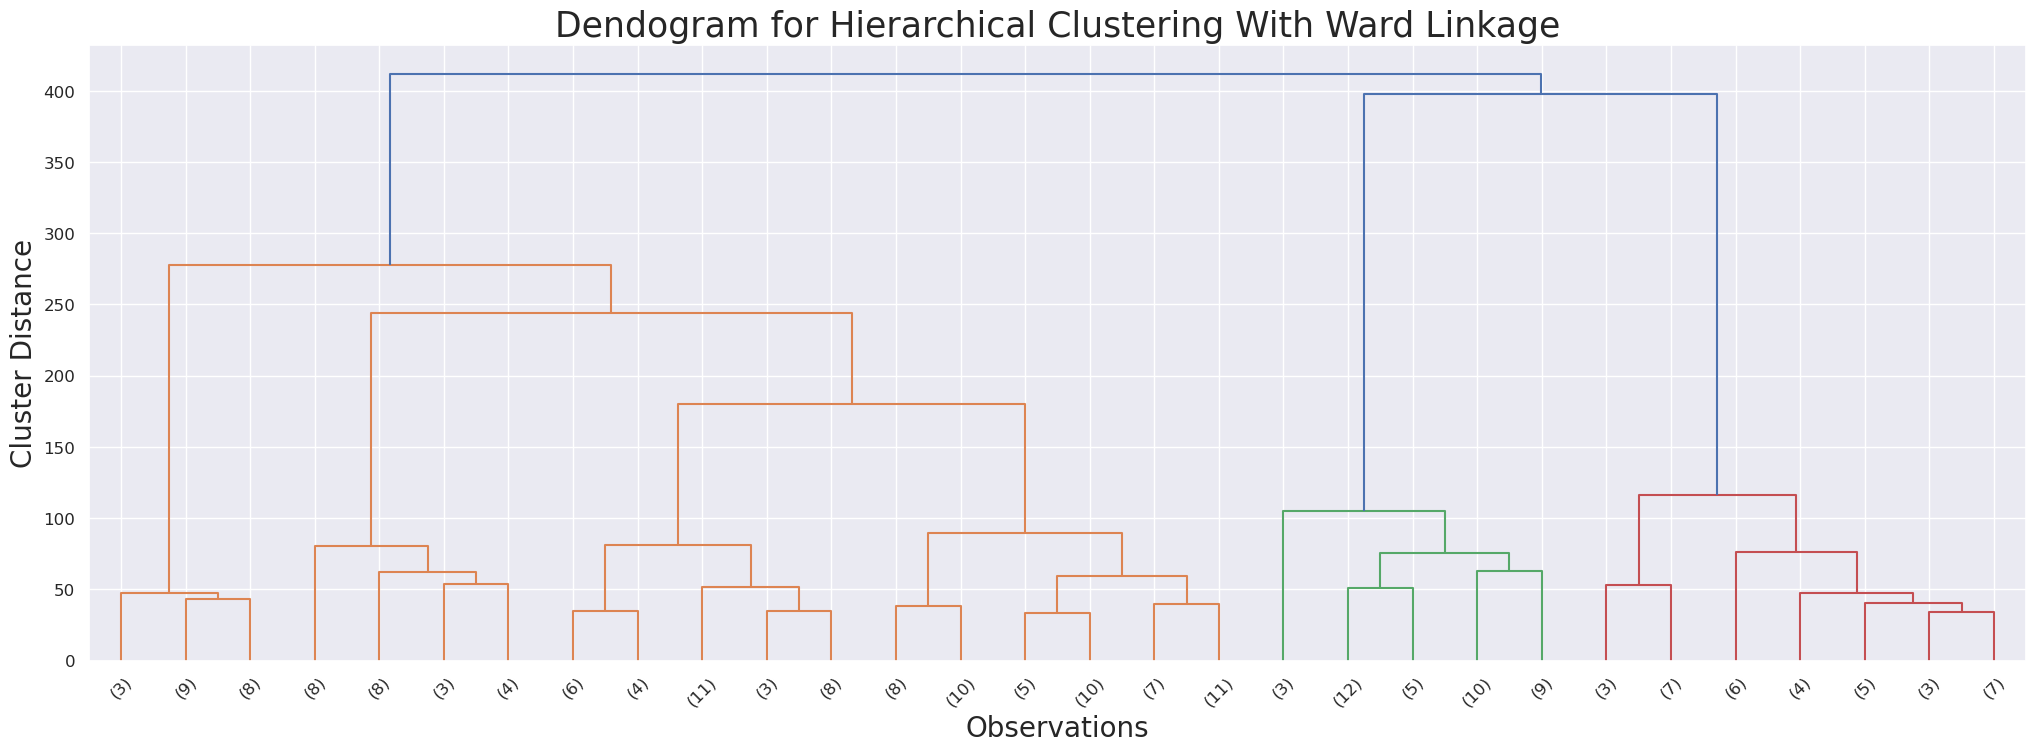

In [13]:
plt.figure(figsize = (25, 8))
ax = plt.axes()
ax = dendrogram(linkage(df, method = 'ward'), truncate_mode = 'lastp', show_leaf_counts = True)
plt.title('Dendogram for Hierarchical Clustering With Ward Linkage', fontsize = 25)
plt.xlabel('Observations', fontsize = 20)
plt.ylabel('Cluster Distance', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

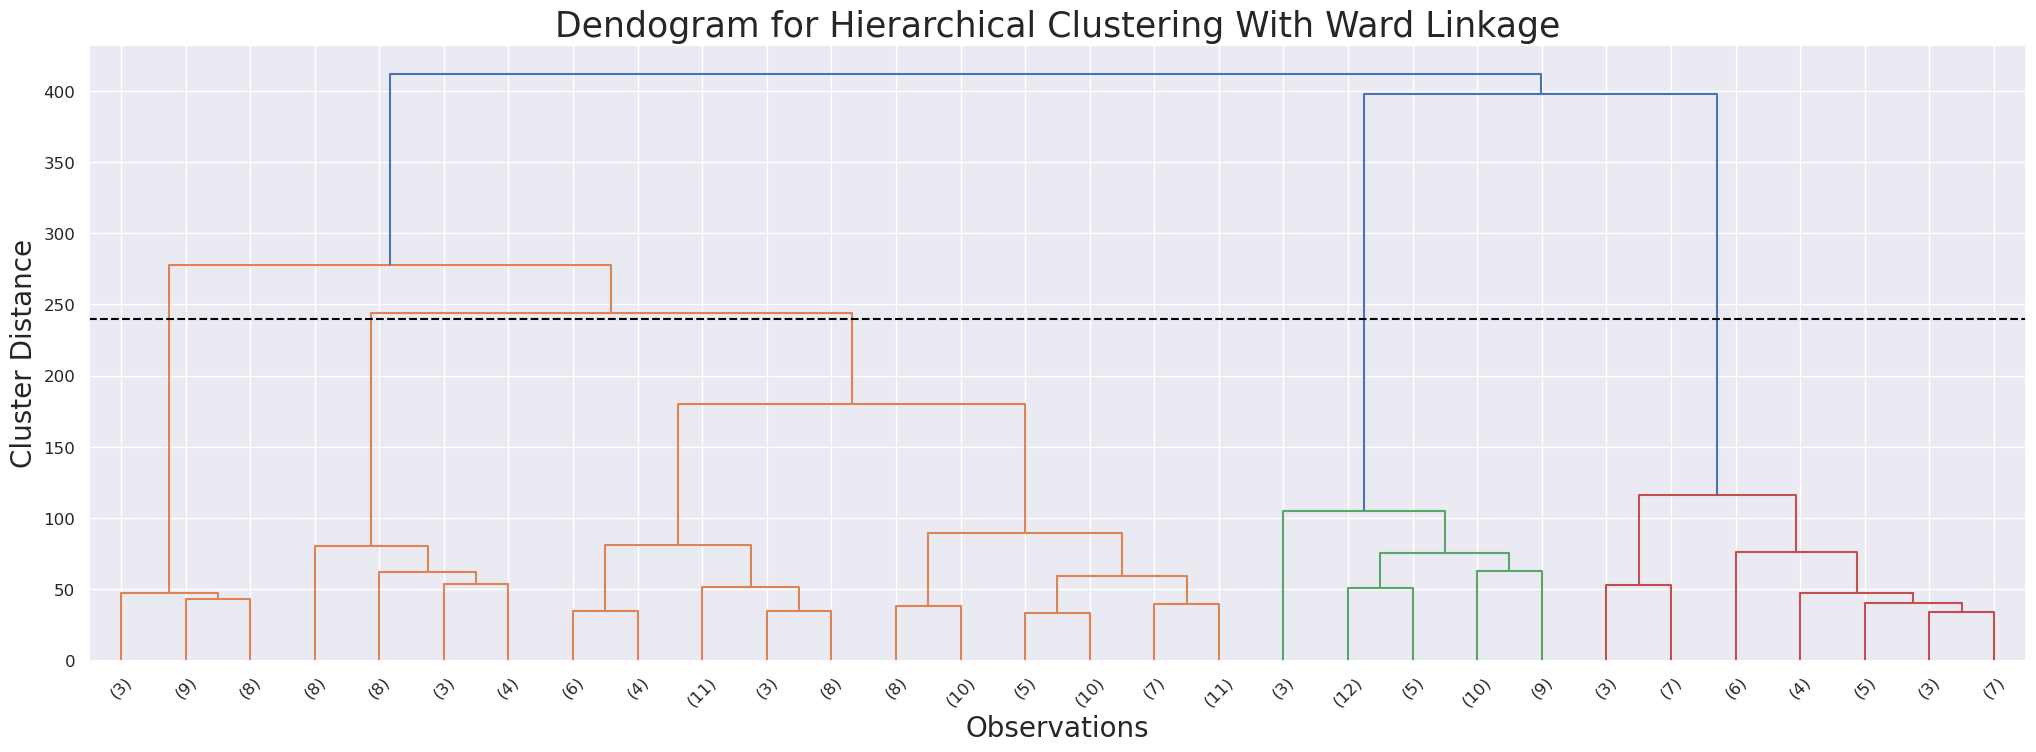

In [14]:
plt.figure(figsize = (25, 8))
ax = plt.axes()
ax = dendrogram(linkage(df, method = 'ward'), truncate_mode = 'lastp', show_leaf_counts = True)
plt.title('Dendogram for Hierarchical Clustering With Ward Linkage', fontsize = 25)
plt.axhline(y = 240, color = 'Black', linestyle = '--')
plt.xlabel('Observations', fontsize = 20)
plt.ylabel('Cluster Distance', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

Find the longest vertical line that is not intersected by any line horizontally. Draw a threshold from there. The number of lines crossed by the boundary gives the number of clusters.

In [15]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')


In [16]:
List =[]
for k in range(1,11):
    hc = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward') # ** eopn dictionary
    hc.fit(df)
    List.append(hc)

The dendrogram above shows the hierarchical clusters created using complete linkage, which joins pairs of clusters together that have the smallest maximum distance between their observations. The height at which the branches split indicates the distance between the clusters. Clusters that are more similar to each other are joined early on in the tree and become less and less similar as we move up the tree. To identify the number of clusters, we can make a horizontal cut across the dendrogram. For instance, if we were to cut the dendrogram at a height of 100, we would have about three clusters, with the majority of customers in the first cluster, colored purple. Let's look at the results of the hierarchical clustering based on customer's spending and income.

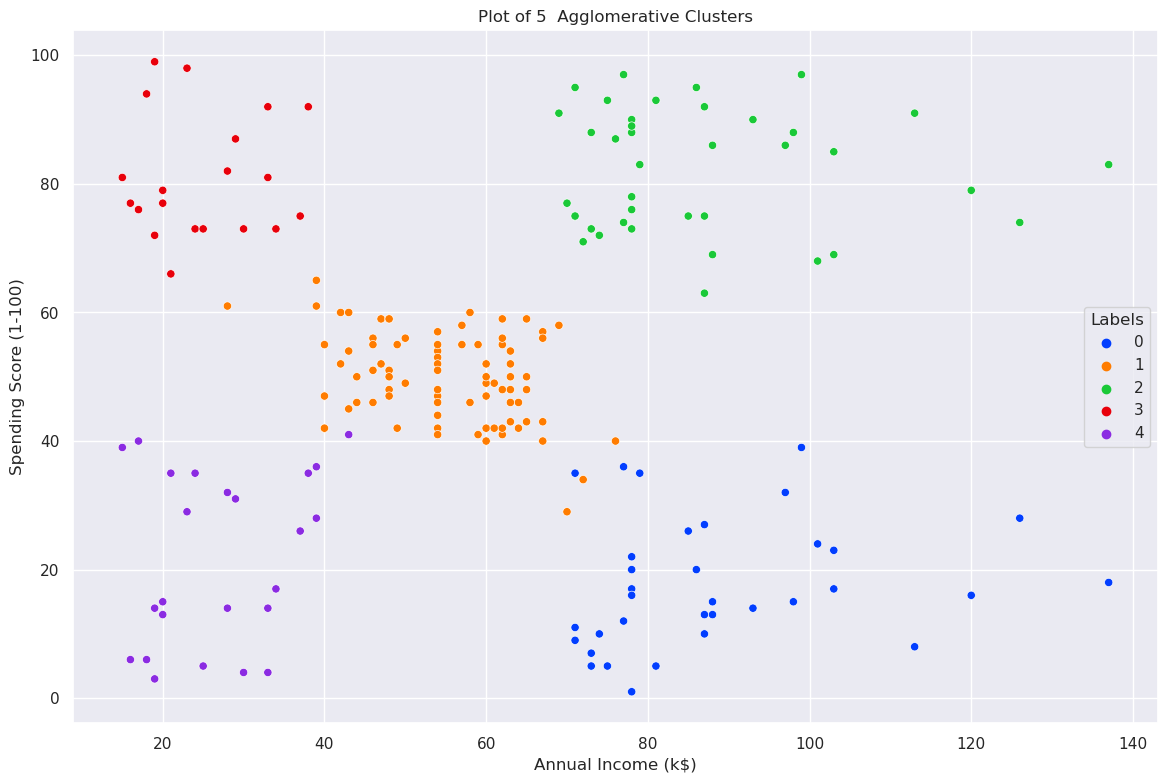

In [17]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix

agglomerative_clusters = AgglomerativeClustering(n_clusters=5, linkage='average').fit(df)

df['Labels'] = agglomerative_clusters.labels_
plt.figure(figsize=(14, 9))
sns.scatterplot(data=df,x=df['Annual Income (k$)'],y= df['Spending Score (1-100)'], hue=df['Labels'], palette=sns.color_palette('bright', 5))
plt.title('Plot of 5  Agglomerative Clusters')
plt.show()

* Cluster with Label 0 displays (blue) --> Those who have high annual income but low spending score
* Cluster with Label 1 displays (orange) --> Those who have mid-level annual income and mid-level spending score
* Cluster with Label 2 displays (green) --> Those who have high annual income and high spending score
* Cluster with Label 3 displays (red) --> Those who have low annual income but high spending score
* Cluster with Label 4 displays (purple) --> Those who have low annual income and low spending score

# K-means

In [18]:
!pip install kneed

In [19]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [20]:
kmeans_set={"init":"random","n_init":10,"max_iter":300,"random_state":43}
List =[]
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, **kmeans_set) # ** eopn dictionary
    kmeans.fit(df)
    List.append(kmeans.inertia_)

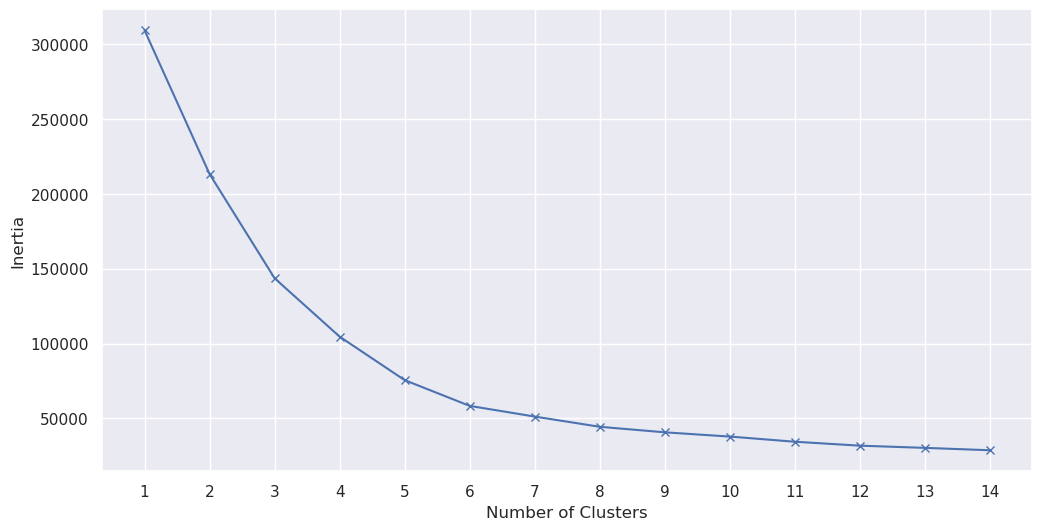

In [21]:
plt.figure(figsize=(12,6))
plt.plot(range(1,15),List,'bx-')
plt.xticks(range(1,15))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [22]:
k1 = KneeLocator(range(1,15),List,curve="convex",direction="decreasing")
k1.elbow

5

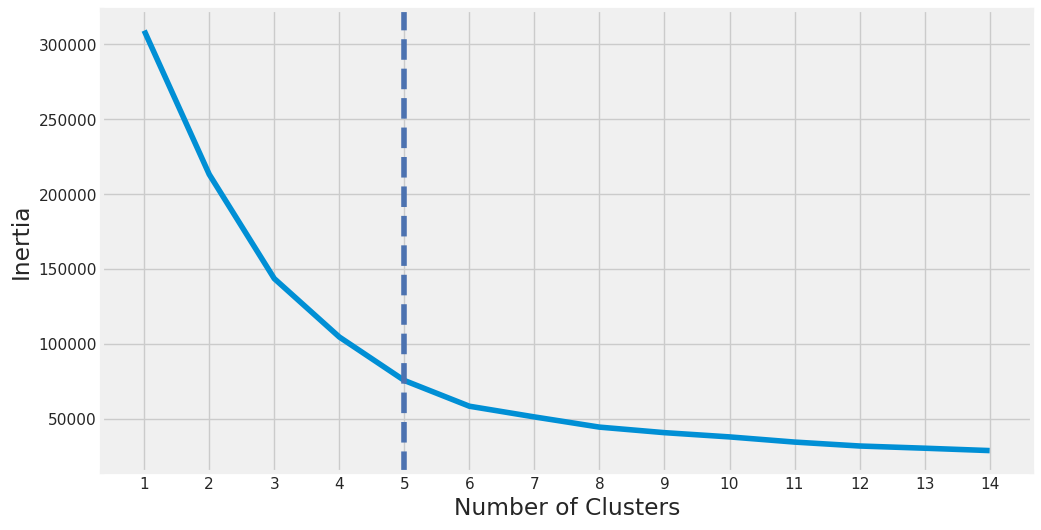

In [23]:
plt.figure(figsize=(12,6))
plt.style.use("fivethirtyeight")
plt.plot(range(1,15),List)
plt.xticks(range(1,15))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.axvline(x=k1.elbow,color='b',label='axvline - full height',ls='--')
plt.show()

# DBSCAN

### Density Based Clustering (DBSCAN)
Most of the traditional clustering techniques, such as k-means, hierarchical and fuzzy clustering, can be used to group data without supervision.

However, when applied to tasks with arbitrary shape clusters, or clusters within cluster, the traditional techniques might be unable to achieve good results. That is, elements in the same cluster might not share enough similarity or the performance may be poor. Additionally, Density-based Clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.

In this part, the main focus will be manipulating the data and properties of DBSCAN and observing the resulting clustering.

### Important Parameters of DBSCAN
* min_samples: Minimum number of data points needed to determine a single cluster.
* eps: How far away can one point be from the next point within the same cluster.

In [24]:
from sklearn.cluster import DBSCAN
import plotly.express as px
from itertools import product
from sklearn.metrics import silhouette_score

### calculate silhouette score 

In [25]:
eps_values = np.arange(11, 16, 1)
min_samples_values = np.arange(5, 13, 1)
param_list = list(product(eps_values, min_samples_values))

clusters = []
sil_score = []

for param in param_list:
    dbscan = DBSCAN(eps = param[0], min_samples = param[1]).fit(df)
    clusters.append(len(np.unique(dbscan.labels_)))
    sil_score.append(silhouette_score(df, dbscan.labels_))

dbscan_df = pd.DataFrame.from_records(param_list, columns = ['Eps', 'Min Samples'])
dbscan_df['Number of Clusters'] = clusters
dbscan_df['Silhouette Score'] = sil_score
dbscan_df

,Eps,Min Samples,Number of Clusters,Silhouette Score
0,11,5,6,0.156144
1,11,6,5,0.182445
2,11,7,6,0.040239
3,11,8,5,0.147287
4,11,9,5,0.131213
5,11,10,5,0.096912
6,11,11,4,0.038410
7,11,12,5,-0.043695
8,12,5,6,0.176597
9,12,6,4,0.180512


In [26]:
dbscan_df['Silhouette Score'] = dbscan_df['Silhouette Score'].astype(str)

fig = px.density_heatmap(dbscan_df, x = 'Eps', 
                         y = 'Min Samples', 
                         z = 'Silhouette Score', 
                         histfunc = 'max',
                         text_auto = '.4f',
                         color_continuous_scale = (['#29A0B1', '#167D7F', '#98D7C2', '#DDFFE7'][::-1]),
)

fig.update_layout(
    template = 'plotly_dark',
    width = 800,
    legend_title='Clusters',
    title = dict(
             text = '<b>DBSCAN Silhouette Scores</b>',
             x = 0.45,
             y = 0.95,
             font = dict(
                 size = 20
             )
         ),
         xaxis_title = '<b>Eps</b>',
         yaxis_title = '<b>Min Samples</b>'
)

fig.show()

#### Silhouette Score s a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

* 1: Means clusters are well apart from each other and clearly distinguished.
* 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
* -1: Means clusters are assigned in the wrong way.



In [27]:
dbscan_df['Silhouette Score'] = dbscan_df['Silhouette Score'].astype(float)
max_sil_score = max(dbscan_df['Silhouette Score'])
dbscan_df[dbscan_df['Silhouette Score'] == max_sil_score]

,Eps,Min Samples,Number of Clusters,Silhouette Score
34,15,7,5,0.289158



The closer the value is to 1, the better the clustering is. The maximum Silhouette Score we have obtained is 0.2892 for Eps = 15 and Min Samples = 7. We will fit these values into the DBSCAN algorithm to achieve optimal clustering.

In [28]:
dbscan = DBSCAN(eps = 15, min_samples = 7).fit(df)
df['DBSCAN Clusters'] = dbscan.labels_
df = df.sort_values(by = ['DBSCAN Clusters'])
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels,DBSCAN Clusters
0,0,19,15,39,4,-1
197,0,32,126,74,2,-1
196,1,45,126,28,0,-1
195,1,35,120,79,2,-1
194,1,47,120,16,0,-1
...,...,...,...,...,...,...
174,1,52,88,13,0,3
168,1,36,87,27,0,3
172,0,36,87,10,0,3
170,0,40,87,13,0,3


In [29]:
df['DBSCAN Clusters'] = df['DBSCAN Clusters'].astype(str)
df['DBSCAN Clusters'] = df['DBSCAN Clusters'].apply(lambda x: 'Outliers' if x == str(-1) else x)

fig = px.scatter(df, x = 'Annual Income (k$)', 
                 y = 'Spending Score (1-100)', 
                 color = 'DBSCAN Clusters', 
                 color_discrete_sequence = ['#FFFFFF', '#F60195', '#0091F7', '#0FF74D', '#F7F700'])

fig.update_traces(marker = dict(size = 10, opacity = 0.80))

fig.update_layout(
    template = 'plotly_dark',
    width = 800,
    legend_title = 'Clusters',
    title = dict(
             text = '<b>DBSCAN Clusters</b>',
             x = 0.5,
             y = 0.95,
             font = dict(
                 size = 20
             )
         ),
         xaxis_title = '<b>Annual Income</b>',
         yaxis_title = '<b>Sum of Spending Scores</b>'
)

fig.show()

As we can see DBSCAN doesn't perform very well because the density in our data is not that strong. white lable means outliers so it will appear most as outliers. We may have performed better if we had had a bigger data.

